In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as f
from torch.autograd import Variable

In [2]:
# Example, using reshape and flatten
n = torch.as_tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
])
def flatten(t):
    t = t.reshape(-1)
    print(t)
    print(t)
    return t

t = flatten(n)
y = torch.flatten(n)
print(y)
print(t)

tensor([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])
tensor([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])
tensor([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])
tensor([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])


In [3]:
#Data Prep
transform = transforms.Compose([
                                
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5, ))
])

trainset = torchvision.datasets.FashionMNIST(
    root="./data",
    download= True,
    train=True,
    transform=transform
)

testset = torchvision.datasets.FashionMNIST(
    root="./data",
    download= True,
    train=False,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(trainset,batch_size=100,shuffle=True,num_workers=0)
test_loader = torch.utils.data.DataLoader(testset,batch_size=100,shuffle=False,num_workers=0)

print(trainset.data.shape)
print(testset.data.shape)

#Get a batch and print its size
data_iter = iter(train_loader)
image, label = data_iter.next()
print(image.shape)
print(label.shape)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([100, 1, 28, 28])
torch.Size([100])


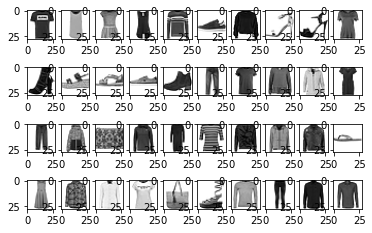

In [4]:
#Checkout data
num_images = 40
for index in range(1, num_images+1):
    plt.subplot(4, 10, index)
    plt.imshow(trainset.data[index], cmap="gray_r")

In [5]:
# Model
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(5),
            nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2,2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(10),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2,2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(20),
            nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2,2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(40)                       
        )

        #Classification
        self.classifier = nn.Sequential(
            nn.Linear(in_features=3*3*40, out_features=200),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=200, out_features=500),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=500, out_features=10)
        )

        
    def forward(self, x):
        #print("1: {}".format(x.shape))
        # Apply the feature extractor in the input
        x = self.features(x)
        #print("2: {}".format(x.shape))
        # Squeeze the three spatial dimensions in one. Here 40 is the o/p from convolution and because of 3 maxpools(2,2) 28x28 is halved 3x3 times to become 3
        x = x.view(-1, 3 * 3 * 40)
        #print("3: {}".format(x.shape))
        # Classify the images
        x = self.classifier(x)
        return x



In [10]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Declare all the layers for feature extraction.
        #For conv2d, here are the params
        #in_channels - Number of channels in the input image. If the input image has 3 channels, then using a 3x3 kernel, there are 3 cubed or 27 weights
        # out_channels (int) – Number of channels produced by the convolution. The output, if you specify, say 5, will have 5 different 3x3 kernels each with 27 weights
        # kernel_size (int or tuple) – Size of the convolving kernel
        # stride (int or tuple, optional) – Stride of the convolution. Default: 1
        # padding (int or tuple, optional) – Zero-padding added to both sides of the input. Default: 0
        self.features = nn.Sequential(nn.Conv2d(in_channels=1,
                                                out_channels=5,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1), 
                                      # Relu here converts all negative inputs to zeroes
                                      nn.ReLU(inplace=True),
                                      nn.Conv2d(in_channels=5,
                                                out_channels=10,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1), 
                                      # max pooling, preserves features but reduces size
                                      nn.MaxPool2d(2, 2),
                                      nn.ReLU(inplace=True),
                                      # Batch normalization, typically, (x-mean(batch))/std dev
                                      nn.BatchNorm2d(10),
                                      nn.Conv2d(in_channels=10,
                                                out_channels=20,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.ReLU(inplace=True),
                                      nn.BatchNorm2d(20),
                                      nn.Conv2d(in_channels=20,
                                                out_channels=40,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.MaxPool2d(2, 2),
                                      nn.ReLU(inplace=True),
                                      nn.BatchNorm2d(40))
        
        # Declare all the layers for classification
        self.classifier = nn.Sequential(
            nn.Linear(7 * 7 * 40, 200),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10))
        
    def forward(self, x):
        #print("1: {}".format(x.shape))
        # Apply the feature extractor in the input
        x = self.features(x)
        #print("2: {}".format(x.shape))
        # Squeeze the three spatial dimensions in one. Here 40 is the o/p from convolution and because of 2 maxpools(2,2) 28x28 is halved 7x7 times to become 7
        x = x.view(-1, 7 * 7 * 40)
        # Classify the images
        x = self.classifier(x)
        return x

In [11]:
# Instantiate the network
model = Net()
# Adam algorithm (Adaptive Momemt Estimation) for scholastic optimization is efficient, simple and has less (not very high) memory requirements.
# With Adam, the lr is adaptive
# Weight decay is a regularization technique. loss = loss + weight decay parameter * L2 norm of the weights
optimizer = optim.Adam(model.parameters(), lr=3e-4,weight_decay=0.001) #lr=0.0003. Thes e settings are good for Adam
criterion = nn.CrossEntropyLoss() # Great for classification, MSE works for regression


In [12]:
num_epochs = 10
count = 0
for epoch in range(num_epochs):
    count = 0
    for i, data in enumerate(train_loader, 0):
        images, labels = data
        # Initialize the gradients
        optimizer.zero_grad()
        #Forward propogation
        preds = model(images)
        # Calculate loss 
        loss = criterion(preds, labels)
        #calculate gradients
        loss.backward()
        #Backward prop
        optimizer.step()

        count = count+1
        if count % 25 == 0:
          print("Batch count {}".format(count))
    #Epoch ends here, so test with test data
    correct = 0
    total = 0
    # Iterate through test dataset
    for i, data in enumerate(test_loader, 0):
      test, labels = data 
      # Forward propagation
      outputs = model(test)
      # Get the predictions from the max value
      predicted = torch.max(outputs.data, 1)[1]

      total += len(labels)
      #compare with labels to figure out accuracy
      correct += (predicted == labels).sum()
      accuracy = 100 * correct / float(total)

    print("Epoch:{}, count:{}, Loss:{}, Accuracy:{}".format(epoch, count, loss.data, accuracy))


Batch count 25
Batch count 50
Batch count 75
Batch count 100
Batch count 125
Batch count 150
Batch count 175
Batch count 200
Batch count 225
Batch count 250
Batch count 275
Batch count 300
Batch count 325
Batch count 350
Batch count 375
Batch count 400
Batch count 425
Batch count 450
Batch count 475
Batch count 500
Batch count 525
Batch count 550
Batch count 575
Batch count 600
Epoch:0, count:600, Loss:0.2581489086151123, Accuracy:87.4000015258789
Batch count 25
Batch count 50
Batch count 75
Batch count 100
Batch count 125
Batch count 150
Batch count 175
Batch count 200
Batch count 225
Batch count 250
Batch count 275
Batch count 300
Batch count 325
Batch count 350
Batch count 375
Batch count 400
Batch count 425
Batch count 450
Batch count 475
Batch count 500
Batch count 525
Batch count 550
Batch count 575
Batch count 600
Epoch:1, count:600, Loss:0.2064705491065979, Accuracy:88.9800033569336
Batch count 25
Batch count 50
Batch count 75
Batch count 100
Batch count 125
Batch count 150
Bat